# Connectivity analysis
-----------------------

Grab the .csv files (Created using extract_timecourse.ipynb), turn back to numpy and create connectivity matrix

In [31]:
import pandas as pd 
from nilearn.connectome import ConnectivityMeasure
from nilearn import datasets
import numpy as np
import nilearn.plotting
import os
import glob
import nilearn
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
%config Completer.use_jedi = False

In [22]:
# grab all files
ts_files = glob.glob('/gpfs/gibbs/pi/levy_ifat/Or/ZivResults/timecourse/sub-*_yeo-17.csv')

In [24]:
# loading as numpy array (for connectivity)
ts_all = []
for file in ts_files:
    f = np.loadtxt(file, delimiter=",",skiprows=1)
    #print(f.shape)
    # remove all that doesn't have 300 (for now)
    if f.shape[0]==300:
        ts_all.append(f)

In [25]:
ts_all = np.array(ts_all)

In [26]:
# load connectome function (can choose correlation, partial correlation etc.)
connectome_measure = ConnectivityMeasure(kind='correlation')

In [27]:
correlation_matrices = connectome_measure.fit_transform(ts_all)

In [28]:
correlation_matrices.shape

(142, 17, 17)

In [29]:
# plot the average one
mean_correlation_matrix = connectome_measure.mean_

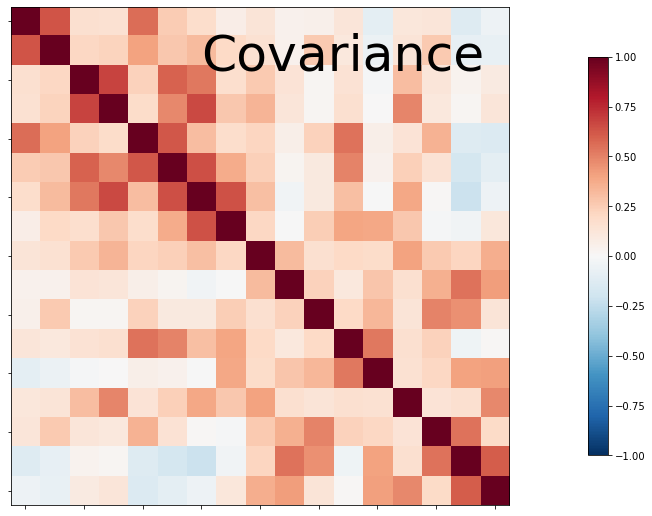

In [35]:
# The covariance can be found at estimator.covariance_
nilearn.plotting.plot_matrix(mean_correlation_matrix, 
                     figure=(9, 7), vmax=1, vmin=-1,
                     title='Covariance')